# Trabajo Práctico Final: Comunicaciones Digitales

El trabajo práctico consiste en la medición de la potencia electromagnética en la extensión del campo de la Unidad Terrena de CoNAE en Córdoba. Está desarrollado enteramente por los alumnos del grupo `"La Banda Ancha de Amigos"`, cuyos integrantes son:

- Cabrera, Augusto Gabriel
- Mansilla, Josías Leonel
- Moroz, Esteban Mauricio
- Villar, Federico Ignacio

## Alcance del trabajo práctico

Para este trabajo práctico final, se pretende medir la potencia del campo electromagnético en el campo mencionado. Para ello se hará uso del siguiente hardware:

- Drone DJI Matrice 300 RTK
- ADALM PLUTO SDR
- Raspberry Pi 4B 

Se montará el SDR sobre el drone, haciendo uso de un soporte impreso en 3D diseñado por integrantes del grupo. Este SDR se encargará de tomar muestras durante el recorrido del drone, para luego unir las coordenadas del log del vuelo y con las muestras obtenidas por la radio definida por software, para con ello generar un mapa de calor.

El SDR se conectará con una Raspberry Pi 4B, que se encargará de tomar las muestras y almacenar los resultados, para luego procesarlos y generar la información necesaria. 

En un inicio, se realizará una simulación a partir del modelo de espacio libre, para evitar tener que llevar el drone al lugar, y además, tener una idea de lo que ocurriría. Luego, aparte de la simulación, se realizarán pruebas en el Laboratorio de Comunicaciones Digitales (LCD) de la Facultad, con dos SDR, uno que transmita a la frecuencia del radar a medir, y que el otro reciba, para poder corroborar la simulación con los datos obtenidos.

## Datos obtenidos de la CoNAE

### Estación Terrena Córdoba

La Estación Terrena Córdoba cuenta con un sistema integrado de antenas conformado por una antena de 3,6 m para TT&C en Banda S y downlink en banda X y S, una antena de 7,3 m para TT&C en Banda S y downlink en Banda X y S, una antena de 13 m para TT&C en Banda S y downlink en Banda X y S, una antena de 3,6 m de SeaSpace para realizar downlink de banda X y una antena de 13,5 m de ViaSat para para TT&C en Banda S y downlink en banda X y S.

Las antenas de 7,3 m y 13 m, que son Datron, y las antenas de 3,5 m SeaSpace y 13,5 m ViaSat, por sus características técnicas, permiten la conmutación en forma automática del seguimiento de un satélite a otro satélite en alrededor de 30 seg, posibilitando la máxima optimización en la planificación de la operación de la Estación.

Además, la Estación Terrena dispone una antena en Banda L, para la adquisición de satélites meteorológicos NOAA, y antenas de UHF y VHF. Las antenas de Banda L están integradas a un sistema automático de Adquisición y generación de Productos estándares de NOAA; también dispone de dos antenas de 2,1 m para la adquisición de imágenes del Satélite GOES.

La Estación Terrena Córdoba ha completado con éxito todos los requerimientos de Radarsat Internacional para proceder a la Certificación de Productos Nivel 1.

En diciembre del año 2002, obtuvo las certificaciones correspondientes a Operación y Generación de Productos Nivel O.

La Estación Terrena Córdoba se encuentra localizada en el Centro Espacial Teófilo Tabanera, entre dos pequeñas cadenas montañosas, a 30 km al sud-oeste de la Ciudad de Córdoba, Provincia de Córdoba. La zona donde está instalada la Estación es un área turística de importancia nacional, por lo que resulta fácil disponer de todas las comodidades necesarias para el alojamiento y transporte de personas.

Sus coordenadas geográficas son:

- Latitud - 31.524075 - 31º 31’23.6765s
- Longitud - 64.463522 - 64º 27’48.6834s
- Altitud -2395 pies 730 metros

Su dirección es:

- Estación Terrena Córdoba - Centro Espacial Teófilo Tabanera – CONAE, Ruta C45, Km 8 (5187) Falda del Cañete, Provincia de Córdoba - Rep. Argentina.
- Teléfono: +54-3547-431000 (líneas rotativas) FAX: +54-3547-431032 o 425999

### Misión Satelital SAOCOM

Los satélites NOAA de banda L a analizar, pertenecen a este tipo de misión satelital. Es por eso que se toman los datos obtenidos de la página de la CoNAE sobre la misión mencionada, para de esa forma mencionar las especificaciones técnicas del radar a analizar.

| Instrumento             | SAR banda L polarimétrico |
| ----------------------- | ------------------------- |
| Frecuencia central      | 1.275 GHz                 |
| Orientación de la observación | A derecha en forma de operación nominal (con capacidad de observar hacia la izquierda) |
| Resolución espacial | 10 a 100 m (según el modo de adquisición) |
| Ancho de barrido | 20 a 350 km (según el modo de adquisición) |
| Rango de ángulo de incidencia | 20 a 50 grados (según el modo de adquisición) |
| Rango dinámico (coeficiende de retrodispersión radar) | -35 dB a 5 dB |
| Exactitud de posicionamiento geográfico (con compensación de efectos topográficos) | 25 m (órbita precisa de 18 días); 70 m (órbita precisa de 48 horas); 90 m (órbita a bordo) |
| Exactitud radiométrica absoluta | 0.5 dB |
| Exactitud polarimétrica | 0.3 dB |
| Modos de adquisición | StripMap, TOPSAR Narrow, TOPSAR Wide |
| Modos de polarización | Simple, Doble, Cuádruple (completa), Compacta |
| Órbita | Heliosincrónica; Altura 620 km; Hora local nodo ascendente 6:12:15 am; Revisita: 16 días (un solo satélite); 8 días (para la constelación) |
| Ciclo de repetición espacial | 16 días para cada satélite; 8 días para la constelación |
| Revisita promedia (sin restricción de modo ni orientación) | Mejor que 2 días |


Se muestra a continuación el mapa de la CoNAE.

In [1]:
import folium
conaeMap = folium.Map(location=[-31.524075, -64.463522], control_scale=True, zoom_start=100, title='Mapa de CoNAE')
conaeMap

## Modelo de espacio libre

Para poder simular el sistema y predecir la potencia recibida en el sistema, se utilizará el llamado modelo de espacio libre. En donde se supone que se está transmitiendo en el vacío, en donde no se tienen objetos cercanos, lo que implica que no existirán rebotes de las señales, que lleven a interferencia constructuva o destructiva en los diferentes puntos del espacio. 

Este modelo es obtenido en un principio del libro Bixio Rimoldi, pero con el complemento de otras bibliografías, se logra terminar de comprender el tema. 

Los modelos de propagación de radio frecuencia surgen de la necesidad de modelar una zona geográfica de terreno irregular para así poder predecir las pérdidas a través del camino hacia el punto de observación (path loss), existe una gran cantidad de factores que se deben tener en cuenta como son:

- Un perfil del terreno de la zona a modelar (zona de cobertura).
- Presencia de obstáculos como edificios, árboles, etc.

### Modelo de propagación en el espacio libre

Este modelo se utiliza para predecir la potencia de la señal cuando entre el transmisor y el receptor existe una clara linea de vista. Los sistemas de comunicación satelital y los enlaces microondas se pueden modelar como propagación en el espacio libre. El modelo del espacio libre predice que la potencia recibida decae como función de la distancia de separación entre el transmisor y receptor elevada potencia.

La potencia recibida en el espacio libre por una antena receptora la cual está separada de la antena transmisora por una distancia $d$, está dada por la siguiente ecuación:

$$
P_R = \frac{P_T G_T G_R \lambda ^2}{(4 \pi)^2 d^2 L}
$$

En donde:

- $P_T$ es la potencia transmitida.
- $P_R$ es la potencia recibida, la cual es función de la separación entre transmisor y receptor.
- $G_T$ es la ganancia de antena transmisora.
- $G_R$ es la ganancia de antena receptora.
- $d$ es la distancia de separación entre el transmisor y el receptor.
- $L$ es el factor de pérdida del sistema no relacionado a la propagación.
- $\lambda$ es la longitud de onda, dada en metros.

En el libro Bixio Rimoldi, se simplifica la ecuación anterior, llevándola a la expresión siguiente, en donde no se tiene en cuenta el factor $L$.

$$
P_R = \frac{P_T G_T G_R}{(\frac{4\pi d}{\lambda})^2}
$$

La ganancia efectiva de una antena está dada por la siguiente expresión:

$$
G = \frac{4 \pi A_e}{\lambda ^2}
$$

en donde $A_e$ es la apertura efectiva, que está relacionado con el tamaño físico de la antena. La longitud de onda de la señal se relaciona con la frecuencia de la portadora a partir del análisis de la propagación de la onda electromagnética:

$$
\lambda = \frac{c}{f}
$$

con $c$ siendo la velocidad de propagación de la luz en el vacío, y $f$ es la frecuencia de la portadora en Hz.

Las pérdidas $L$ son usualmente debidas a la atenuación de la línea de transmisión, pérdidas por filtros no ideales y a las antenas de comunicación. El modelo utilizado supone una $L=1$, es decir, pérdidas nulas. La primera ecuación muestra que la potencia de la señal recibida se atenúa con el cuadrado de la distancia entre el transmisor y el receptor, es decir, 20 dB por década, por lo que es posible obtener la siguiente expresión:

$$
P_{L(dB)} = 10 \log (\frac{P_T}{P_R}) = -10 \log (\frac{G_T G_R \lambda ^2}{(4 \pi)^2 d^2})
$$

Se puede reescribir entonces:

$$
L_{P(dB)} = 20 \log (d) + 20 \log (f) - 10 \log (G_T) - 10 \log (G_R) - 147.55 \ dB
$$

Si se asume que la ganancia de las antenas es unitaria (por ejemplo, para el caso en que se quieran usar 2 SDR, uno como transmisor y otr como receptor), la ecuación se convierte en:

$$
P_{L(dB)} = 10 \log (\frac{P_T}{P_R}) = -10 \log (\frac{\lambda ^2}{(4\pi)^2 d^2})
$$

Esta ecuación, conocida como ecuación de Friis, es válida únicamente para predecir el valor de $P_R$ en lo que se conoce como campo lejano de la antena transmisora. El campo lejano (far - field) o región de Fraunhofer de una antena transmisora se define como la distancia más allá de $d_f$, la cual se relaciona con la dimensión mayor de la apertura numérica de la antena transmisora y con la longitud de onda de la portadora. La distancia de Fraunhofer está dada por:

$$
d_f = 2 \frac{D^2}{\lambda}
$$

en donde $D$ es la dimensión física mayor de la antena. Adicionalmente, para estar en la región de campo lejano, se debe satisfacer $d_f>>D$ y $d_f>>1$. Se puede entender que la ecuación tampoco es válida para $d=0$. Por esta razón, la distancia cercana $d_0$ es definida como un punto de referencia con una potencia recibida conocida. La potencia $P_R(d)$ a cualquier distancia $d>d_0$ puede relacionarse a $P_R$ con $d_0$. $P_R(d_0)$ puede predecirse de la ecuación de Friis o puede ser medida tomando el promedio de las potencias recibidas en cualquier punto a una distancia $d_0$ del transmisor, la distancia $d_0$ se debe escoger de forma ue esté dentro del campo lejano, y debe ser menor que cualquier distancia práctica utilizada en sistemas de comunicación móvil.

### Modelo de pérdidas (log-distance)

Este modelo se resume a modo ilustrativo, ya que puede ser el que obedezca la simulación con SDRs del sistema transmisor - receptor a probar dentro del Laboratorio de Comunicaciones Digitales. 

De acuerdo a muchos investigadores, los modelos de propagación en interiores obedecen la siguiente ley:

$$
P_{L(dB)} = P_L(d_0) + 10 n \log (\frac{d}{d_0}) + X_\sigma
$$

en donde $n$ depende del entorno y tipo de materiales, $X_\sigma$ es una variable normal con desviación estándar $\sigma$ y $P_L$ son las pérdidas por trayectoria (path loss). Se muestra a continuación una tabla que indica valores típicos de las constantes en distintos tipos de edificios:

| Building | Frequency (MHz) | n | sig (dB) |
| -- | -- | -- | -- |
| Retail stores | 914 | 2.2 | 8.7 |
| Grocery stores | 914 | 1.8 | 5.2|
| Office, hard partition | 1500 | 3 | 7 |
| Office, soft partition | 900 | 2.4 | 9.6 |
| Office, soft partition | 1900 | 2.6 | 14.1 |
| Textile / chemical factory | 1300 | 2 | 3 |
| Textile / chemical factory | 4000 | 2.1 | 7 |
| Papers / cereals factory | 1300 | 1.8 | 6 |
| Metalworking factory | 1300 | 1.6 | 5.8 |
| Indoor street suburban home | 900 | 3 | 7 |

en donde sig (dB) son pérdidas.

## Modelo de canal inalámbrico

Nuevamente, este modelo se encuentra aquí a modo de información complementaria para la simulación realizada con los dispositivos SDR dentro del laboratorio, es decir, en interiores.

Se parte del hecho de que un canal sin distorsión se modela como un sistema lineal invariante en el tiempo (SLIT) causal, cuya respuesta al impulso es:

$$
H_c(f) = k \cdot e^{-2 \pi ft_d} \cdot \Pi(\frac{f}{2B})
$$

donde $k$ es un factor multiplicativo y $t_d$ un retardo finito. La segunda componente del modelo corresponde al ruido introducido en el canal, que se modela como aditivo de acuerdo a cómo se lo trató en el desarrollo de la materia.

### Atenuación o pérdida de camino

Cuando el medio de comunicación es el aire, se denomina a la atenuación como pérdida de camino (path loss), con la nomenclatura $L(d)$. El path loss corresponde a la relación entre la potencia transmitida y la recibida a una distancia $d$:

$$
L(d) = \frac{P_T}{P_R(d)}
$$

### Espacio libre

El modelo en el caso del espacio libre está dado por:

$$
L(d) = (\frac{4 \pi d}{\lambda})^2 = (\frac{4 \pi f d}{c})^2
$$

con los parámetros definidos como se hizo anteriormente. Esta relación en dBs queda de la siguiente forma:

$$
L_{dB}(d) = 20 \log (4\pi) + 20 \log(d) - 20 \log (\lambda)
$$

Esta relación se considera válida además para el diseño de radioenlaces cuando se cumple lo denominado como línea de vista o LOS (line of sight). Se dice que hay LOS entre dos puntos cuando no hay obstáculos en la línea recta que los une, en este caso entre transmisor y receptor. La condición debe obtenerse de una región denominada primer elipsoide de Fresnel.

### Generalización

Por la complejidad que implica modelar la propagación en el aire para distintos ambientes, en donde diversos mecanismos (reflexión, distorsión, absorción) se dan simultáneamente, existe un modelo simplificado que contempla diversos escenarios. A través de desarrollo teórico y medidas de campo, se ajusta un modelo general de la forma:

$$
L(d) = L(d_0) \ \frac{d}{d_0}^\gamma
$$

en dBs:

$$
L_{dB}(d) = L_{dB}(d_0) + 10 \cdot \gamma \cdot \log (\frac{d}{d_0})
$$

Este modelo se ajusta a distintos ambientes mediante el ajuste de medidas de campo para determinar el $\gamma$ más adecuado en cada caso, la siguiente tabla lista algunos ejemplos:

| Edificación | $\gamma$ |
| -- | -- |
| Macrocelda urbana | 3.7-6.5 |
| Microcelda urbana | 2.7-3.5 |
| Edificio de oficinas (mismo piso) | 1.6-3.5 |
| Edificio de oficinas (pisos distintos) | 2-6 |
| Local comercial | 1.8-22 | 
| Fábrica | 1.6-3.3 |
| Hogar | 3 |

### Ruido

El ruido que se introduce en una comunicación por aire está determinado por las condiciones en el receptor. El modelo a utilizar es el del ruido blanco gaussiano aditivo AWGN (variable aleatoria de media cero y potencia $\sigma^2$ con densidad espectral de potencia constante $\frac{N_0}{2}$). Si se considera un ancho de banda de transmisión B, se tiene que la potencia de ruido en recepción es: $\sigma ^2 = \frac{N_0}{2} \cdot 2B = N_0 B$.

## Simulaciones

### Campo real

Para obtener una aproximación del campo real, se creará un campo de una dimensión de 300m x 600m. Se tendrá una resolución de 2 puntos por metro, es decir, una extensión dividida en cuadrados de 50cm de lado. Con esto, además de los datos de ganancia de receptor unitaria del SDR, ganancia de la antena obtenida de los datos de CoNAE (como coeficiente de retrodispersión radar), una potencia transmitida ejemplo de 10 W, y el posicionamiento de 4 antenas de forma arbitraria, se obtendrá un mapa de calor.

Ganancia de transmisor de:  -33  [dB]


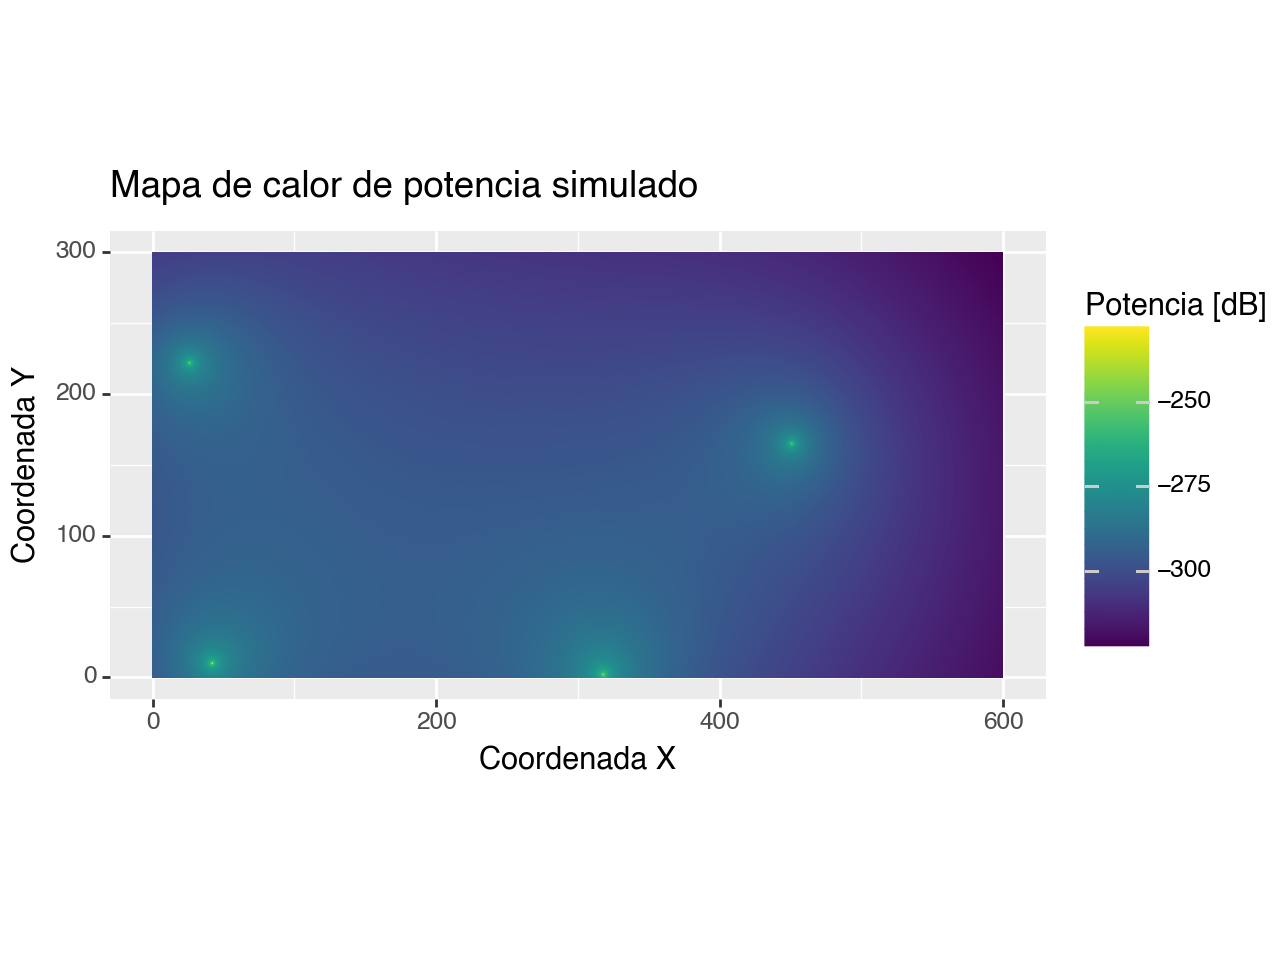

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_tile, ggtitle, xlab, ylab, theme

pt = 10e3
gt = np.random.randint(-35, 5)
gr = 0
c = 3e8
lda = c/1.275e9

print('Ganancia de transmisor de: ', gt, ' [dB]')

long = 600
width = 300
res = 2

longDots = long*res
widthDots = width*res
x = np.linspace(0, long, longDots)
y = np.linspace(0, width, widthDots)
xx, yy = np.meshgrid(x, y)
dots = np.vstack((xx.ravel(), yy.ravel())).T

sdrLoc = (np.random.randint(0, 300), np.random.randint(0, 150))
ant2 = (np.random.randint(0, 300), np.random.randint(150, 300))
ant3 = (np.random.randint(300, 600), np.random.randint(0, 150))
ant4 = (np.random.randint(300, 600), np.random.randint(150, 300))


def powerSDRTx(x, y):
    d = np.sqrt((x - sdrLoc[0]) ** 2 + (y - sdrLoc[1]) ** 2)
    pr = 10*np.log10(pt) + gt + gr + 20 * np.log10(lda) - 20 * np.log10(4 * np.pi * d)
    return pr


def powerAnt2(x, y):
    d = np.sqrt((x - ant2[0]) ** 2 + (y - ant2[1]) ** 2)
    pr = 10*np.log10(pt) + gt + gr + 20 * np.log10(lda) - 20 * np.log10(4 * np.pi * d)
    return pr


def powerAnt3(x, y):
    d = np.sqrt((x - ant3[0]) ** 2 + (y - ant3[1]) ** 2)
    pr = 10*np.log10(pt) + gt + gr + 20 * np.log10(lda) - 20 * np.log10(4 * np.pi * d)
    return pr


def powerAnt4(x, y):
    d = np.sqrt((x - ant4[0]) ** 2 + (y - ant4[1]) ** 2)
    pr = 10*np.log10(pt) + gt + gr + 20 * np.log10(lda) - 20 * np.log10(4 * np.pi * d)
    return pr


power = powerSDRTx(dots[:, 0], dots[:, 1])+powerAnt2(dots[:, 0], dots[:, 1]) + \
    powerAnt3(dots[:, 0], dots[:, 1])+powerAnt4(dots[:, 0], dots[:, 1])

df = pd.DataFrame({'x': dots[:, 0], 'y': dots[:, 1], 'Potencia [dB]': power})

p = ggplot(df, aes(x='x', y='y', fill='Potencia [dB]')) + geom_tile() + \
    ggtitle('Mapa de calor de potencia simulado') + xlab('Coordenada X') + ylab('Coordenada Y')
p = p+theme(aspect_ratio=0.5)
print(p)


En el código anterior se obtiene una ganancia de transmisor aleatoria entre -35 a 5 dB, y la ubicación de las antenas también se obtiene de forma aleatoria. A continuación se muestra el dataFrame generado.

In [10]:
df

,x,y,Potencia [dB]
0,0.000000,0.0,-293.576384
1,0.500417,0.0,-293.453499
2,1.000834,0.0,-293.329565
3,1.501251,0.0,-293.204560
4,2.001668,0.0,-293.078463
...,...,...,...
719995,597.998332,300.0,-319.617255
719996,598.498749,300.0,-319.654173
719997,598.999166,300.0,-319.691078
719998,599.499583,300.0,-319.727969


### Simulación dentro del Laboratorio de Comunicaciones Digitales

Ahora se simula de forma similar a la anterior, pero con ganancia de antenas emisoras y transmisoras unitarias, además de una disminución en la potencia de transmisión (llevándola a 7 mW), y, por supuesto, se reducen las dimensiones del recinto analizado.

Ganancia de transmisor de:  0  [dB]


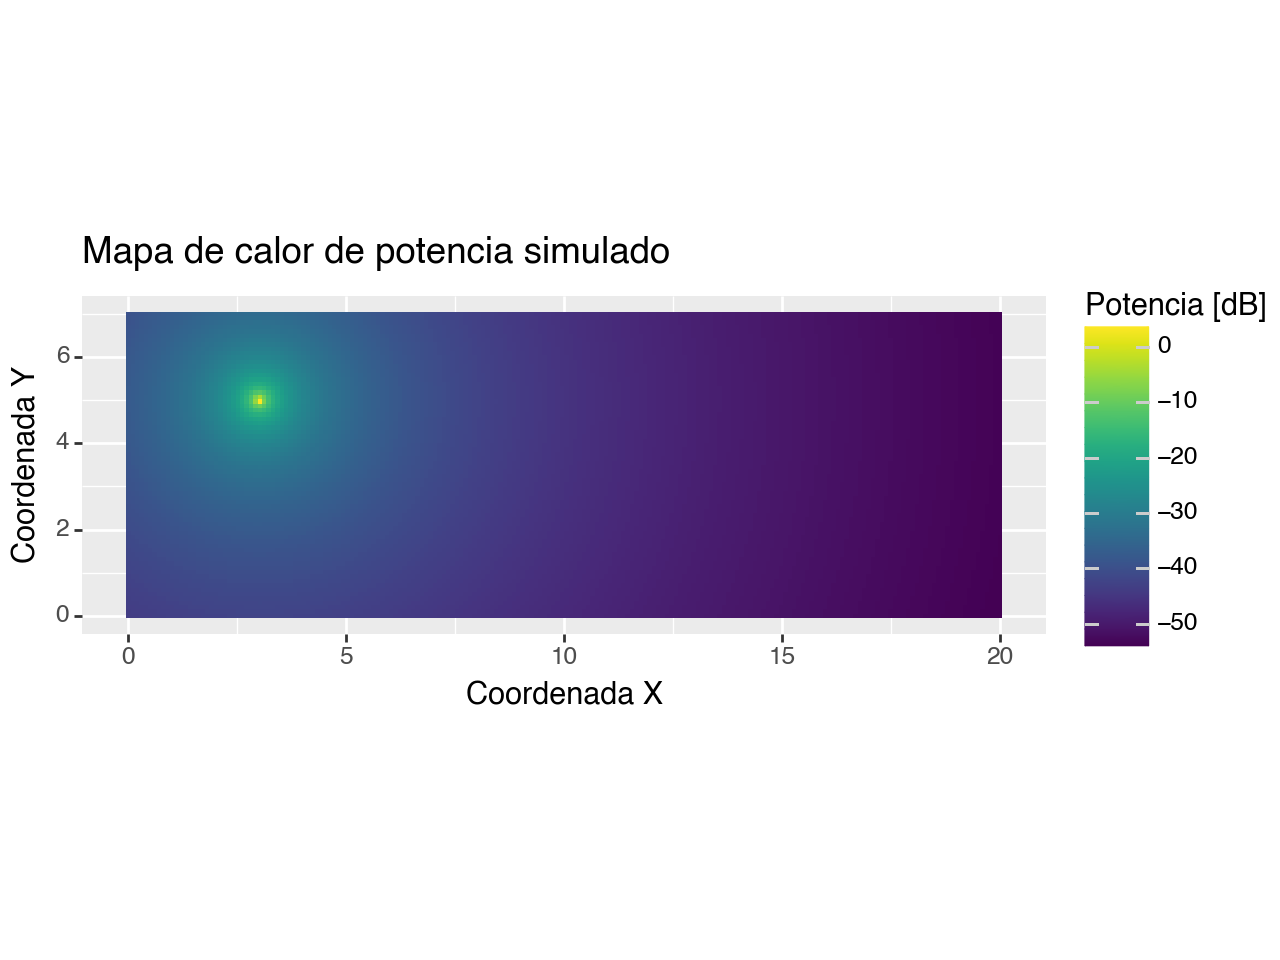

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_tile, ggtitle, xlab, ylab, theme

pt = 7
gt = 0
gr = 0
c = 3e8
lda = c/1.275e9

print('Ganancia de transmisor de: ', gt, ' [dB]')

long = 20
width = 7
res = 10

longDots = long*res
widthDots = width*res
x = np.linspace(0, long, longDots)
y = np.linspace(0, width, widthDots)
xx, yy = np.meshgrid(x, y)
dots = np.vstack((xx.ravel(), yy.ravel())).T

sdrLoc = (3,5)

def powerSDRTx(x, y):
    d = np.sqrt((x - sdrLoc[0]) ** 2 + (y - sdrLoc[1]) ** 2)
    pr = pt + gt + gr + 20 * np.log10(lda) - 20 * np.log10(4 * np.pi * d)
    return pr

power = powerSDRTx(dots[:, 0], dots[:, 1])

df = pd.DataFrame({'x': dots[:, 0], 'y': dots[:, 1], 'Potencia [dB]': power})

p = ggplot(df, aes(x='x', y='y', fill='Potencia [dB]')) + geom_tile() + \
    ggtitle('Mapa de calor de potencia simulado') + xlab('Coordenada X') + ylab('Coordenada Y')
p = p+theme(aspect_ratio=7/20)
print(p)

## SDR (Software Defined Radio)

Una radio definida por software es un sistema de comunicaciones de radiofrecuencia que cuenta con etapas de transmisión y recepción reconfigurables. Esta característica permite adaptar al SDR a distintos sistemas y protocolos de comunicaciones utilizando los mismos recursos de hardware. El SDR utilizado basa su funcionamiento en la interacción de dos circuitos integrados, como los mostrados a continuación:

<div style="text-align:center">
    <img src="img/sdrBlock.png" alt="Figure 1">
</div>

El primer chip es el AD9363, un transceptor del tipo de conversión directa, diseñado para realizar la modulación, demodulación y acondicionamiento de la señal en banda base y en radiofrecuencia. Una parte de este acondicionamiento se efectúa mediante el procesamiento digital de la señal y otra parte mediante un procesamiento analógico. Para ello cuenta en su parte digital con filtros FIR, filtros de decimación e interpolación y controles de ganancia. En tanto, su parte analógica tiene implementado filtros, amplificadores, atenuadores y mezcladores de RF. La incorporación de conversores DACs y ADCs en el chip hace posibles estas dos formas de tratar a la señal. En la figura siguiente se observa un diagrama en bloques detallado del dispositivo en cuestión:

<div style="text-align:center">
    <img src="img/ad963Block.png" alt="Figure 2">
</div>

El segundo chip es el Zynq Z-7010, un circuito integrado que implementa en su interior una FPGA y un microprocesador ARM Cortex A9. Estos recursos son utilizados para conformar el controlador principal del SDR. Además, el fabricante deja disponible en la FPGA un filtro decimador que puede dividir por 8 la frecuencia de muestreo, permitiendo extender la mínima frecuencia entregada por el transceptor de 512.833 kSPS a 65.1024 kSPS.

En el procesador ARM se encuentra instalado el sistema operativo Linux, en cuyo kernel se ejecuta un subsistema llamado Linux IIO Subsystem, que está destinado a proporcionar soporte a aquellos periféricos que no tienen sus propios subsistemas. De esta forma, es posible configurar los parámetros de funcionamiento del AD9363 (tales como las frecuencias de los osciladores, ancho de banda, ganancia del AGC, etc) utilizando los drivers ya existentes para este dispositivo. La siguiente figura muestra un diagrama de bloques del Zynq Z-7010.

<div style="text-align:center">
    <img src="img/fpgaBlock.png" alt="Figure 3">
</div>

Considerando la etapa receptora, las componentes en fase y cuadratura son enviadas a la FPGA una vez que han sido digitalizadas por el AD9363. Luego, el controlador de acceso directo a memoria AXI DMAC transfiere los datos suministrados por la FPGA a una memoria que es externa al Z-7010 pero que forma parte del SDR. Durante este proceso, se realiza un cambio en la forma de transferencia de datos, pasando de datos de transmisión continua a datos transmitidos por paquetes de $n$ muestras. 